In [1]:
import brainsurf.data.csv as csv_file_import 

In [2]:
pre_data=csv_file_import.read_csv_eeg('brainsurf/data/samples/yog_post.csv')
pre_data.head()

,EEG
0,-18.60350
1,-10.69950
2,-4.33350
3,1.33667
4,1.97144


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

def extract_frequency_bands(dataframe, sampling_rate, save_path=None):
    # Extract raw EEG data from the DataFrame
    raw_data = dataframe['EEG'].values
    
    # Apply a bandpass filter to remove unwanted frequencies
    filtered_data = signal.filtfilt(*signal.butter(4, [0.5, 30], btype='bandpass', fs=sampling_rate), raw_data)
    
    # Compute the power spectral density
    f, psd = signal.welch(filtered_data, fs=sampling_rate, nperseg=1024)
    
    # Define frequency ranges for different bands
    frequency_ranges = {
        'delta': (1, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 50)
    }
    
    # Initialize empty dictionaries to store the band power values
    band_powers = {band: [] for band in frequency_ranges}
    
    # Compute the average power in each frequency band
    for band, (start_freq, end_freq) in frequency_ranges.items():
        band_indices = np.where((f >= start_freq) & (f <= end_freq))
        band_power = np.mean(psd[band_indices])
        band_powers[band].append(band_power)
    
    # Save the band power values to a CSV file if save_path is provided
    if save_path is not None:
        df = pd.DataFrame(band_powers)
        df.to_csv(save_path, index=False)
    
    return band_powers

def plot_boxplot(dataframe):
    dataframe.boxplot()
    plt.xlabel('Frequency Bands')
    plt.ylabel('Power')
    plt.title('Power Distribution of Frequency Bands')
    plt.show()

def plot_spectrogram(dataframe, sampling_rate):
    raw_data = dataframe['EEG'].values
    f, t, Sxx = signal.spectrogram(raw_data, fs=sampling_rate, nperseg=1024, noverlap=512)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
    plt.colorbar(label='Power Spectral Density (dB)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()


In [4]:
frequency_bands = extract_frequency_bands(pre_data, 250,'./brainsurf/bandpower.csv')
print(frequency_bands)

{'delta': [7.124145391539354], 'theta': [1.0218878104105307], 'alpha': [0.3301688297781121], 'beta': [0.1589027842259871], 'gamma': [0.005692455558422789]}


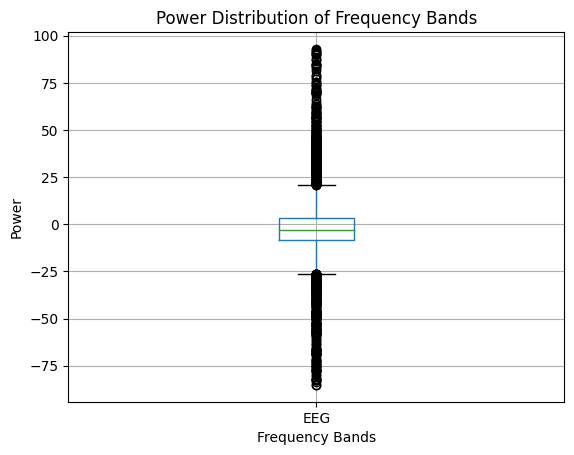

In [5]:
plot_boxplot(pre_data)

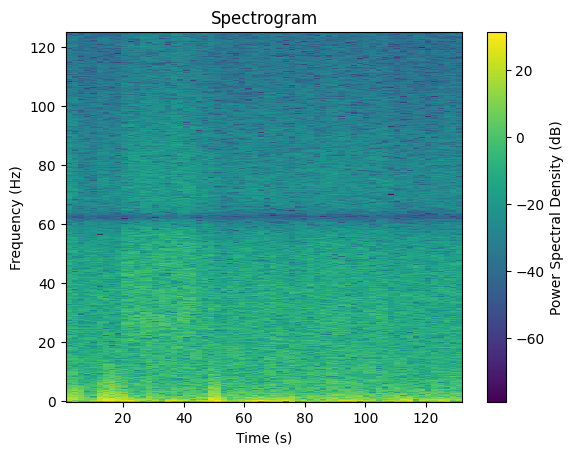

In [6]:
plot_spectrogram(pre_data, 250)